In [11]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def create_parameter_table_steady(left_bounds,right_bounds, init_bounds, L_bounds, num_points):
    left_Tb = np.linspace(left_bounds[0], left_bounds[1], num_points)
    right_Tb = np.linspace(right_bounds[0], right_bounds[1], num_points)
    init_Tb = np.linspace(init_bounds[0], init_bounds[1], num_points)
    L_b = np.linspace(L_bounds[0], L_bounds[1], num_points)

    
    #print('create_parameter_table_steady-------')
    #print(left_Tb)
    #print(right_Tb)
    #print(init_Tb)
    #print(L_b)

    # Create a meshgrid from the parameter values
    param1_grid, param2_grid, param3_grid, param4_grid = np.meshgrid(left_Tb, right_Tb, init_Tb,L_b, indexing='ij')

    # Reshape the grids to a table
    param_table = np.vstack([param1_grid.ravel(), param2_grid.ravel(), param3_grid.ravel(), param4_grid.ravel()]).T

    return param_table

# Example usage:
#param1_bounds = (0, 1)
#param2_bounds = (10, 20)
#param3_bounds = (-5, 5)
#num_points = 3

#parameter_table = create_parameter_table(param1_bounds, param2_bounds, param3_bounds, num_points)
#print(parameter_table)

Nx = 50        # Number of spatial grid points
k = 1.0



    #print(parameter_table.shape)


def simuluate_steady_fdm(T_left,T_right,T_init, L):
    # Discretize the spatial domain
    dx = L / Nx
    x = np.linspace(0, L, Nx + 1)
    
    # Initialize the temperature field
    T = np.zeros(Nx + 1)
    
    # Set boundary conditions
    T[0] = T_left
    T[Nx] = T_right
    
    # Define the heat source or sink term (q(x)) (in watts per meter)
    q = np.zeros(Nx + 1)
    
    # Define the thermal conductivity (k) - constant (in watts per meter per degree Celsius)
    #k = 1.0
    
    # Define the convergence criterion and maximum iterations for the solver
    max_iterations = 1000
    tolerance = 1e-5
    
    # Finite Difference Solver
    for iteration in range(max_iterations):
        T_new = np.copy(T)
        for i in range(1, Nx):
            T_new[i] = 0.5 * (T[i - 1] + T[i + 1] + dx**2 * q[i] / k)
        max_error = np.max(np.abs(T_new - T))
        T = np.copy(T_new)
        if max_error < tolerance:
            break
    #print(T.shape)
    return T

def generate_parameter_and_measurement_tables(parameter_table, simulate_function=simuluate_steady_fdm):
    num_measurements = Nx + 1
    num_params = parameter_table.shape[1]

    # Create a table for measurements with an additional ID column
    measurement_table = np.zeros((parameter_table.shape[0], num_measurements + 1))
    parameter_table_new = np.zeros((parameter_table.shape[0], parameter_table.shape[1]+1))
    grid_table = np.zeros((parameter_table.shape[0], num_measurements + 1))
    measurement_table[:, 0] = np.arange(1, parameter_table.shape[0] + 1)  # Assign unique IDs
    parameter_table_new[:, 0] = np.arange(1, parameter_table.shape[0] + 1)  # Assign unique IDs
    grid_table[:, 0] = np.arange(1, parameter_table.shape[0] + 1)  # Assign unique IDs
    

    # Copy parameter values to the first `num_params` columns
    #measurement_table[:, 1:num_params + 1] = parameter_table

    # Apply the simulate function to generate 100 measurements for each row
    for i in range(parameter_table.shape[0]):
        param_values = parameter_table[i, :]
        T_left,T_right,T_init, L = param_values
        measurements = simulate_function(T_left,T_right,T_init, L)
        #print("------------")
        #print(measurement_table.shape)
        #print(measurements.shape)
        #print(measurement_table[i, 1:].shape)
        measurement_table[i, 1:] = measurements
        grid_table[i, 1:] = np.linspace(0, L, num_measurements)
        parameter_table_new[i, 1:] = param_values

    return parameter_table_new, measurement_table, grid_table
    
def generate_steady_state_1D_cond(left_up,left_down,right_up,right_down, init_up,init_down, L_up, L_down, num_points):
    left_bounds = (left_down, left_up)
    right_bounds = (right_down, right_up)
    init_bounds = (init_down, init_up)
    L_bounds = (L_down, L_up)
    parameter_table = create_parameter_table_steady(left_bounds,right_bounds, init_bounds, L_bounds, num_points)
    #print(parameter_table.shape)
    parameter_table_new,measurement_table,grid_table = generate_parameter_and_measurement_tables(parameter_table)
    return parameter_table_new,measurement_table, grid_table 


import numpy as np
import matplotlib.pyplot as plt

def plot_random_measurements(parameter_table, measurement_table, num_random_measurements=5):
    # Get IDs and random indices for the measurements
    ids = measurement_table[:, 0]
    random_indices = np.random.choice(ids, num_random_measurements, replace=False)

    # Plot random measurements with IDs in the legend
    for i in random_indices:
        row_index = np.where(ids == i)[0][0]
        measurements = measurement_table[row_index, 1:]
        parameters = parameter_table[row_index, :]
        plt.plot(measurements, label=f'ID {int(i)}')
        print(f"Parameters for ID {int(i)}: {parameters}")

    plt.xlabel('Measurement Index')
    plt.ylabel('Measurement Value')
    plt.legend()
    plt.title(f'Random {num_random_measurements} Measurements')
    plt.show()




(4096, 5)
(4096, 52)
(4096, 52)
Parameters for ID 3853: [3.85300000e+03 3.00000000e+02 2.21428571e+02 2.14285714e+01
 9.64285714e-01]
Parameters for ID 3616: [3.61600000e+03 3.00000000e+02 5.00000000e+01 6.42857143e+01
 1.50000000e+00]
Parameters for ID 2654: [2.65400000e+03 2.42857143e+02 9.28571429e+01 6.42857143e+01
 1.14285714e+00]
Parameters for ID 2243: [2.24300000e+03 2.14285714e+02 1.78571429e+02 0.00000000e+00
 6.07142857e-01]
Parameters for ID 744: [744.         128.57142857 178.57142857  85.71428571   1.5       ]
Parameters for ID 2127: [2.12700000e+03 2.14285714e+02 9.28571429e+01 2.14285714e+01
 1.32142857e+00]
Parameters for ID 701: [701.         128.57142857 135.71428571 150.           0.96428571]
Parameters for ID 837: [837.         128.57142857 264.28571429   0.           0.96428571]
Parameters for ID 2326: [2.32600000e+03 2.14285714e+02 2.21428571e+02 4.28571429e+01
 1.14285714e+00]


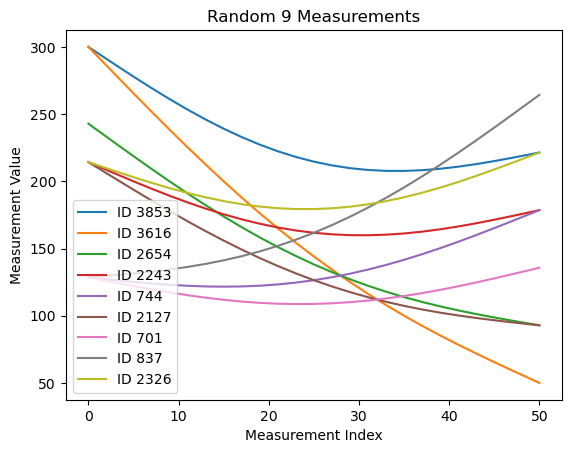

In [12]:
left_up = 300.
left_down = 100.
right_up = 350.
right_down = 50.
init_up = 150.
init_down = 0.
num_points = 8
L_up = 1.5
L_down = 0.25




parameter_table_new,measurement_table, grid_table = generate_steady_state_1D_cond(left_up,left_down,right_up,right_down, init_up,init_down,L_up, L_down,num_points)

print(parameter_table_new.shape)
print(measurement_table.shape)
print(grid_table.shape)

num_random_measurements = 9

# Plot random measurements and print corresponding parameters from the default simulation
plot_random_measurements(parameter_table_new, measurement_table, num_random_measurements)

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

params = parameter_table_new[:,1:]
measurem = measurement_table[:,1:]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(params, measurem, test_size=0.2, random_state=42)

# Standardize input features
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize output measurements
scaler_y = StandardScaler().fit(y_train)
y_train_scaled = scaler_y.transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build a sequential neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(measurem.shape[1])  # Output layer with 100 units (assuming 100 measurements)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss: {loss}")

Epoch 1/50
82/82 [==============================] - 0s 1ms/step - loss: 0.6326 - val_loss: 0.1247
Epoch 2/50
82/82 [==============================] - 0s 692us/step - loss: 0.0340 - val_loss: 0.0103
Epoch 3/50
82/82 [==============================] - 0s 777us/step - loss: 0.0075 - val_loss: 0.0055
Epoch 4/50
82/82 [==============================] - 0s 643us/step - loss: 0.0045 - val_loss: 0.0036
Epoch 5/50
82/82 [==============================] - 0s 760us/step - loss: 0.0032 - val_loss: 0.0026
Epoch 6/50
82/82 [==============================] - 0s 651us/step - loss: 0.0024 - val_loss: 0.0020
Epoch 7/50
82/82 [==============================] - 0s 654us/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/50
82/82 [==============================] - 0s 736us/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/50
82/82 [==============================] - 0s 649us/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/50
82/82 [==============================] - 0s 791us/step - loss: 9.5783e-04 - val_loss: 9.03

1/1 [==============================] - 0s 23ms/step


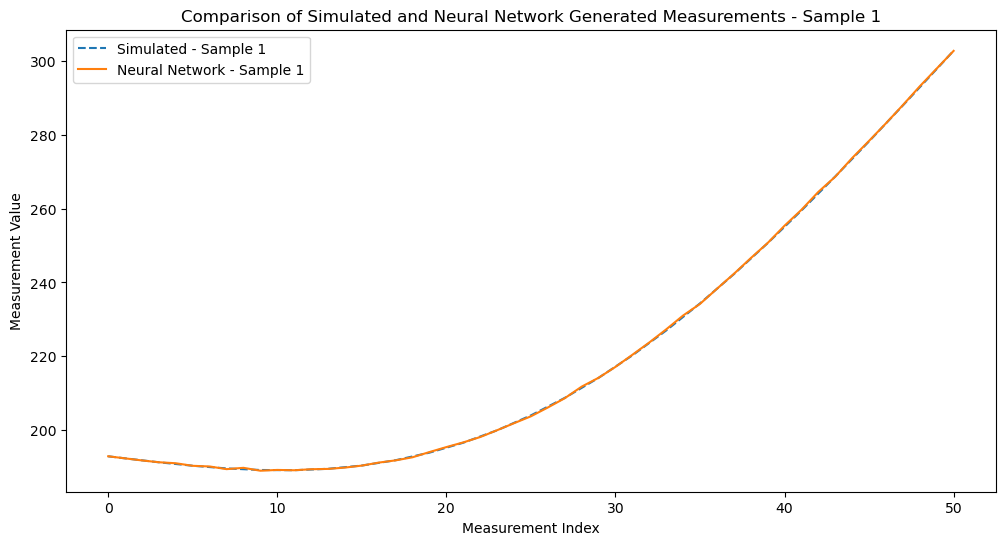

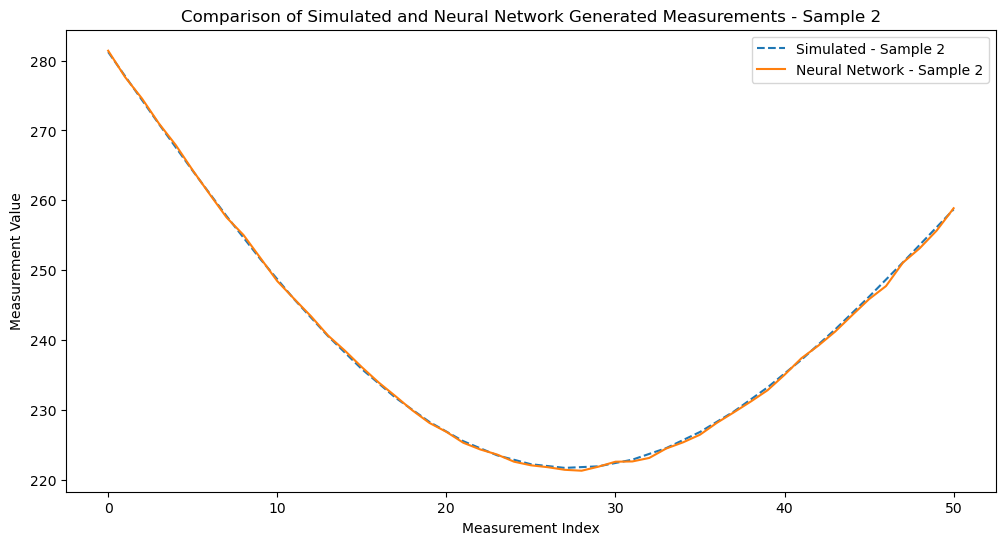

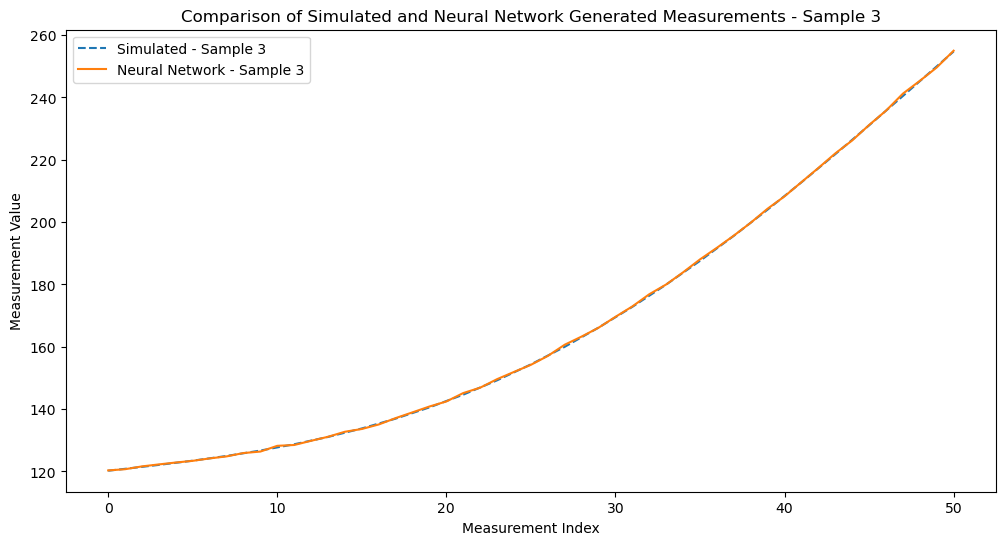

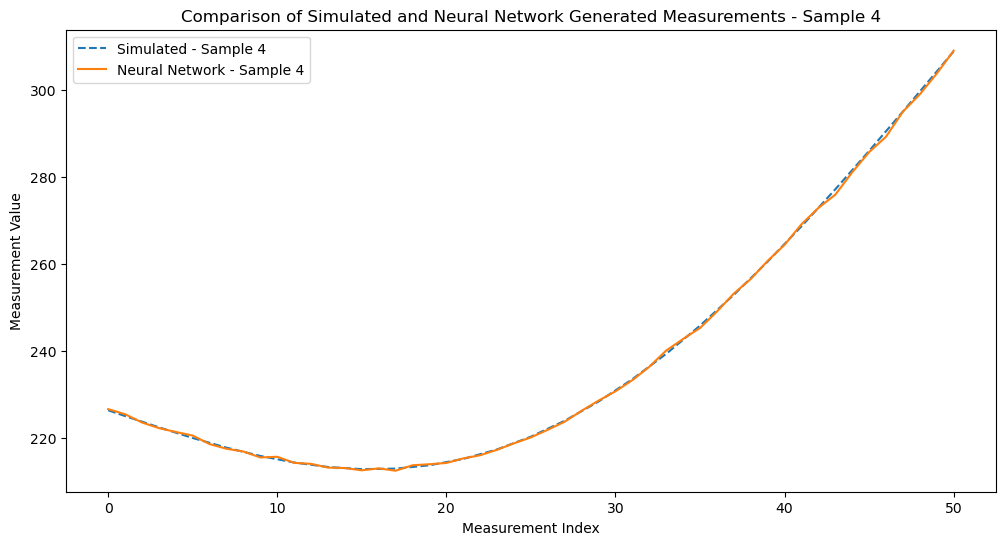

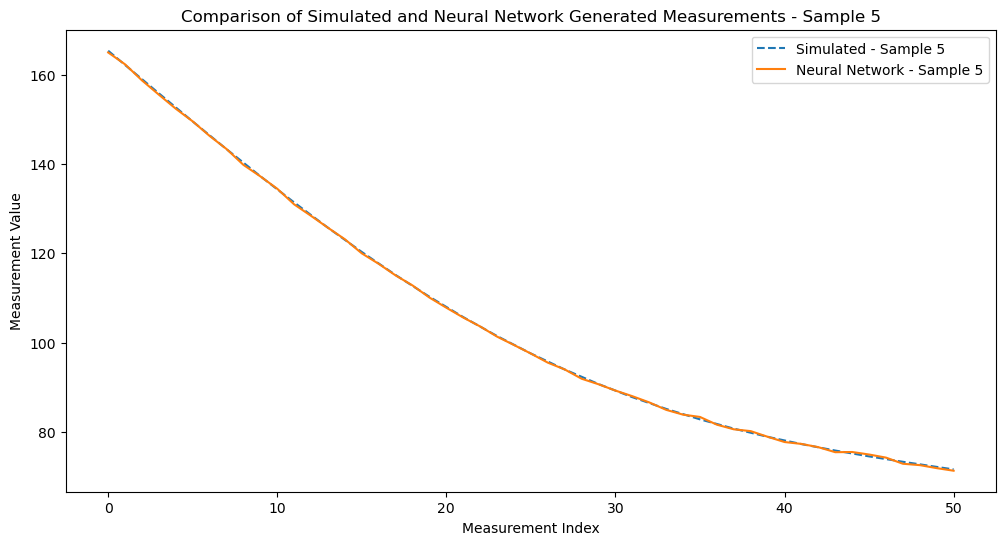

In [14]:
def generate_random_parameters(left_bounds,right_bounds, init_bounds, L_bounds, num_samples):
    param_bounds = [left_bounds,right_bounds, init_bounds, L_bounds]
    param_values = [np.random.uniform(bounds[0], bounds[1], num_samples) for bounds in param_bounds]
    param_samples = np.vstack(param_values).T
    return param_samples

def generate_measurements_nn(model, param_samples, scaler_X, scaler_y):
    param_samples_scaled = scaler_X.transform(param_samples)
    measurements_scaled = model.predict(param_samples_scaled)
    measurements = scaler_y.inverse_transform(measurements_scaled)
    return measurements

left_bounds = (left_down, left_up)
right_bounds = (right_down, right_up)
init_bounds = (init_down, init_up)
L_bounds = (L_down, L_up)

num_samples = 5
random_parameters = generate_random_parameters(left_bounds,right_bounds, init_bounds, L_bounds, num_samples)

measurements_simulated = np.vstack([simuluate_steady_fdm(left,right,init,L) for left,right,init,L in random_parameters])


# Generate measurements using the trained neural network
measurements_nn = generate_measurements_nn(model, random_parameters, scaler_X, scaler_y)
#print("Random Parameter Samples:")
#print(random_parameters)
#measurements_nn

for i in range(num_samples):
    plt.figure(figsize=(12, 6))
    plt.plot(measurements_simulated[i], label=f'Simulated - Sample {i+1}', linestyle='--')
    plt.plot(measurements_nn[i], label=f'Neural Network - Sample {i+1}')
    plt.xlabel('Measurement Index')
    plt.ylabel('Measurement Value')
    plt.legend()
    plt.title(f'Comparison of Simulated and Neural Network Generated Measurements - Sample {i+1}')
    plt.show()

In [16]:
model.save('1D_cond_NN_pred_steady.h5')

/data/anaconda3/envs/load_curve/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
